Data from Kaggle:

https://www.kaggle.com/antfarol/car-sale-advertisements

https://www.kaggle.com/satadru5/car-sale-prediction

# 1. Importing the relevant libraries

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# 2. Common function

In [13]:
def Predictive_Model(num_df, cat_df, target):
    
    
    # merge num_df and dummy cat_df
    if(cat_df.shape[0] > 0):
        input_df = pd.concat([input_df,cat_df],axis=1)
    
    # scaling features for numerical vars
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(num_df)
    input_df = scaler.transform(num_df)
    input_df = pd.DataFrame(input_df, columns = num_df.columns)
        
    # train test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(input_df, target, test_size=0.2, random_state=365)
    
    # build model
    import statsmodels.api as sm
    X = sm.add_constant(X_train)
    results = sm.OLS(y_train, X).fit()
    
    # return result
    print(results.summary())
    
    # print Rsquare of train set and test sest
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    print('Train set score: ', reg.score(X_train, y_train))
    print('Test set score: ', reg.score(X_test, y_test))

In [49]:
# Distribution plot

def analyse_continuous(df,var,target):
    df = df.copy()
    # df[var] = df[var].fillna(df[var].median())
    plt.figure(figsize=(20,5))
       
    # histogram
    plt.subplot(141)
    sns.distplot(df[var], bins=30)
    #sns.distplot(df[var],hist=True, kde=True,kde_kws={'shade': True, 'linewidth': 3})
    plt.title('Histogram')    
    
    # Q-Q plot
    plt.subplot(142)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.ylabel('Quantiles')    
    
    # boxplot
    plt.subplot(143)
    sns.boxplot(x=df[var])
    plt.title('Boxplot')
       
    ## scatter plot
    plt.subplot(144)
    plt.scatter(df[var],target)
    plt.title('scatter plot')
    
    # skewness and kurtosis
    print('Skewness: %f' % df[var].skew())
    print('Kurtosis: %f' % df[var].kurt())
    plt.show()

# 3. Loading the raw data

In [137]:
df = pd.read_csv('CarSale.csv')
org_df = df.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# 4. Data Preprocessing & Experiments

## 4.1. Training model without preprocessing data

### 4.1.1. Numerical vars

### 4.4.2. Combine with categorical vars

## 4.2. Dealing with missing data

## 4.3. Preprocessing numerical vars

### Linear assumption 

### 4.3.1. Treating outliers

#### Remove outliers

#### Top-coding

### 4.3.2. Transformation

#### Log transform

#### Other transform

### 4.3.3. Linear relationship

### 4.3.4. Scaling features

## 4.4. Preprocessing categorical vars

### 4.4.3. Encode vars

### 4.4.1. High cardinality vars

### 4.4.2. Rare labels

### 4.1. Dealing with missing value: Removing rows with missing values

In [138]:
print('Original shape: ', df.shape)
df = df.dropna(axis=0)
print('After removing data: ', df.shape)

df = df.reset_index(drop=True)

Original shape:  (4345, 9)
After removing data:  (4025, 9)


In [168]:
df.head(30)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
6,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
7,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
8,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
9,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane


# 5. Experiments

## 5.1. Exp 1 

+ Use only numerical vars

#### Independent vars

In [140]:
num_vars = [var for var in df.columns if df[var].dtypes != 'O' and var != target_var]
target = df['Price']
num_df = df[num_vars]
cat_df = pd.DataFrame()

num_df.head()

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011


Skewness: 4.444409
Kurtosis: 28.929701


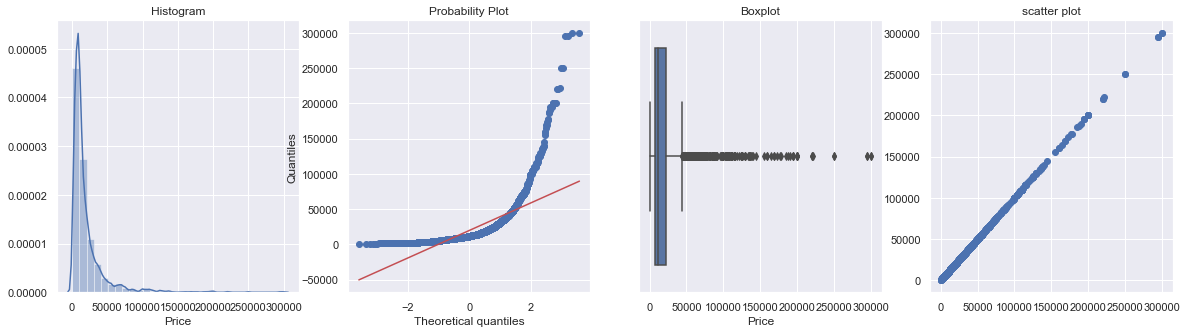

In [141]:
analyse_continuous(df,'Price',target)

#### Variable distribution

Skewness: 0.700196
Kurtosis: 1.809798


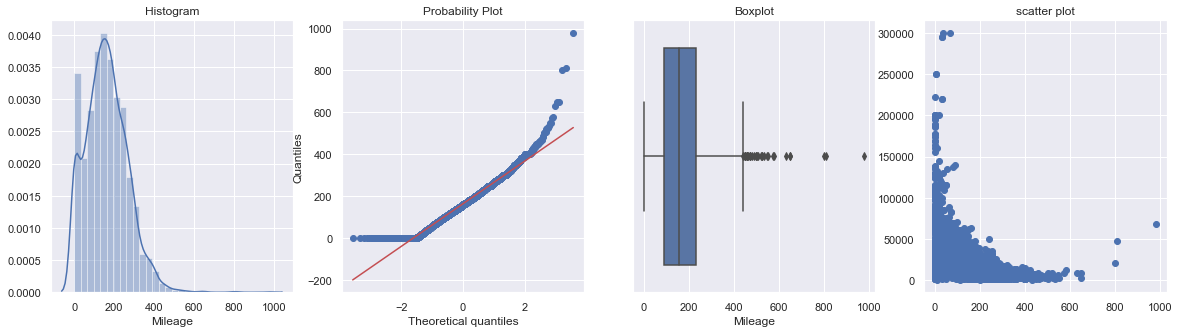

Skewness: 17.154962
Kurtosis: 316.181652


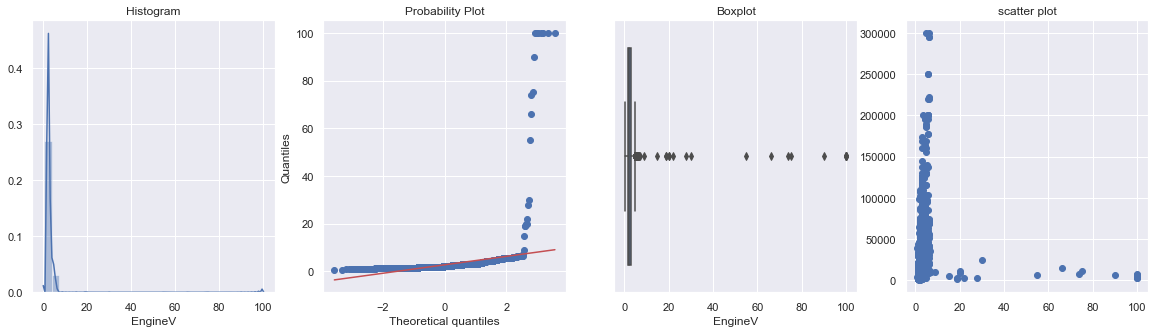

Skewness: -0.963945
Kurtosis: 0.999387


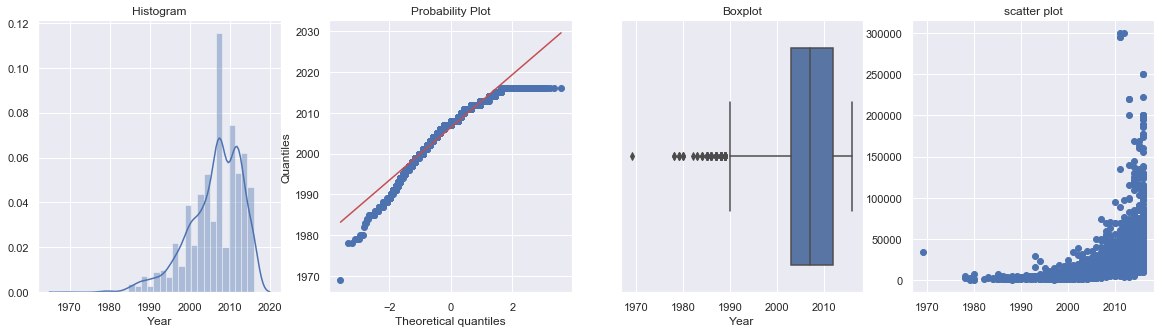

In [142]:
for var in num_vars:
    analyse_continuous(df,var,target)

In [143]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     409.0
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          4.92e-225
Time:                        06:11:14   Log-Likelihood:                -36910.
No. Observations:                3220   AIC:                         7.383e+04
Df Residuals:                    3216   BIC:                         7.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.98e+04    405.829     48.787      0.0

## 5.1. Exp 2 

+ Use only numerical vars
+ Handling outliers

In [144]:
df.shape

(4025, 9)

In [145]:
# function to find upper and lower boundaries
# for normally distributed variables


def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

Skewness: -0.963945
Kurtosis: 0.999387


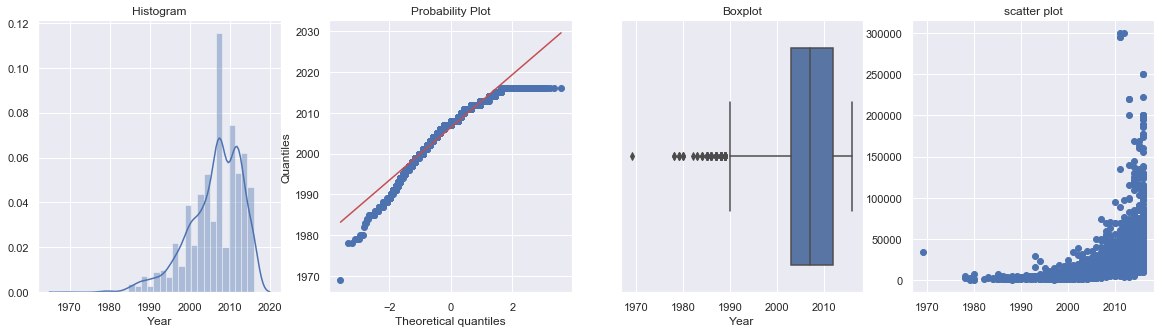

In [146]:
analyse_continuous(df,'Year',target)

In [147]:
# calculate boundaries for RM
upper_boundary, lower_boundary = find_normal_boundaries(df, 'Year')
upper_boundary, lower_boundary

(2026.46641322036, 1986.292841438025)

In [148]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Year (right end outliers): {}'.format(
    len(df[df['Year'] > upper_boundary])))

print('cars with less than lower_boundary of Year (left end outliers: {}'.format(
    len(df[df['Year'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Year'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Year'] < lower_boundary]) / len(df)))

total number of Year: 4025
cars with more than upper_boundary of Year (right end outliers): 0
cars with less than lower_boundary of Year (left end outliers: 38

% right end outliers: 0.0
% left end outliers: 0.009440993788819876


In [149]:
df = df[(df.Year < upper_boundary) & (df.Year > lower_boundary)]
df.shape

(3987, 9)

Skewness: -0.762869
Kurtosis: 0.201604


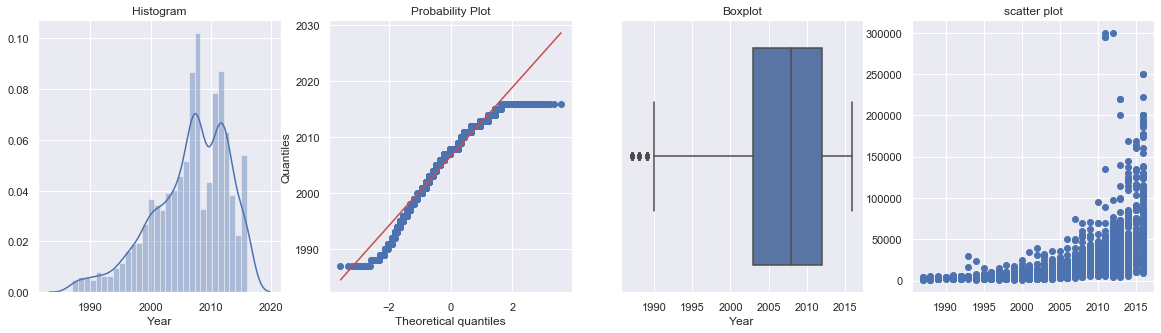

In [150]:
target = df['Price']
analyse_continuous(df,'Year',target)

In [151]:
# function to find upper and lower boundaries
# for skewed distributed variables


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

Skewness: 0.706495
Kurtosis: 1.868399


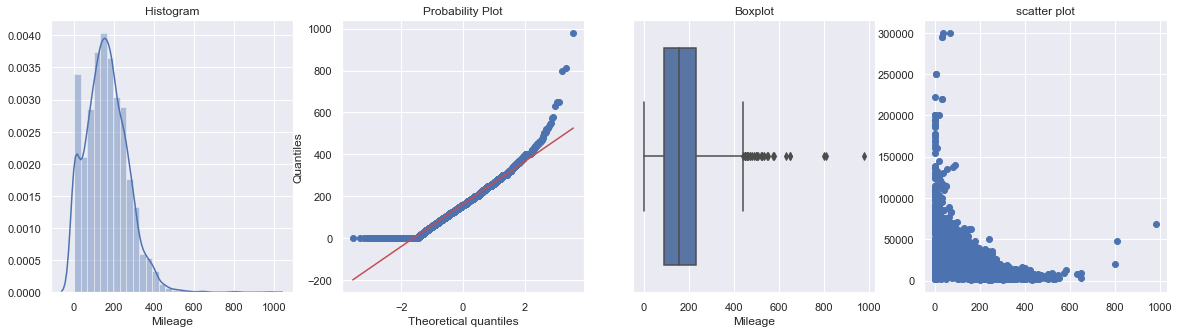

In [152]:
target = df['Price']
analyse_continuous(df,'Mileage',target)

In [153]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'Mileage', 2)
upper_boundary, lower_boundary

(510.0, -190.0)

In [154]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['Mileage'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['Mileage'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Mileage'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Mileage'] < lower_boundary]) / len(df)))

total number of Year: 3987
cars with more than upper_boundary of Mileage (right end outliers): 14
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.003511412089290193
% left end outliers: 0.0


In [155]:
df = df[(df.Mileage < upper_boundary) & (df.Mileage > lower_boundary)]
df.shape

(3973, 9)

Skewness: 0.368103
Kurtosis: -0.178503


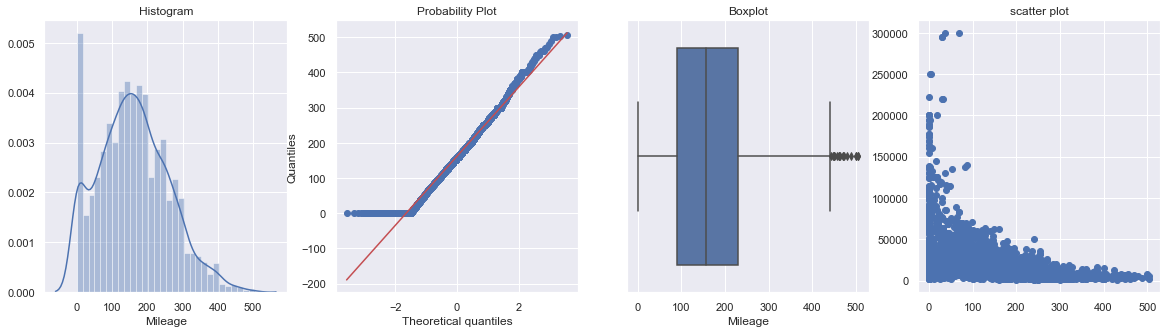

In [156]:
target = df['Price']
analyse_continuous(df,'Mileage',target)

Skewness: 17.049629
Kurtosis: 312.213441


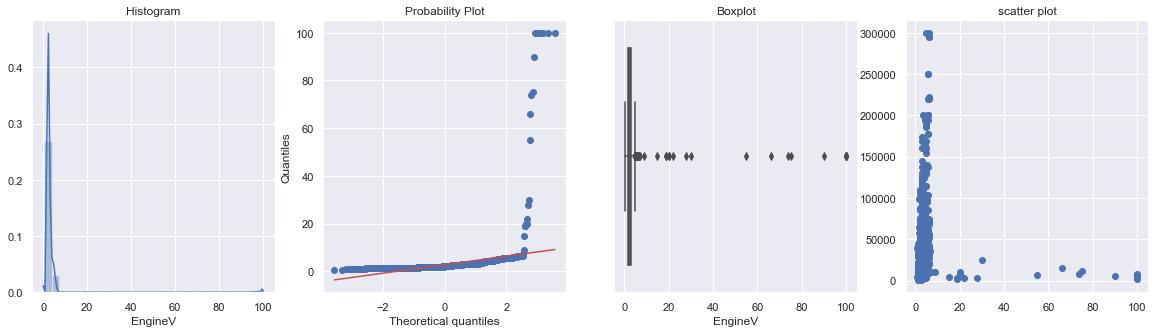

In [157]:
target = df['Price']
analyse_continuous(df,'EngineV',target)

In [158]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'EngineV', 5)
upper_boundary, lower_boundary

(9.0, -4.2)

In [159]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['EngineV'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['EngineV'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['EngineV'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['EngineV'] < lower_boundary]) / len(df)))

total number of Year: 3973
cars with more than upper_boundary of Mileage (right end outliers): 20
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.005033979360684621
% left end outliers: 0.0


In [160]:
df = df[(df.EngineV < upper_boundary) & (df.EngineV > lower_boundary)]
df.shape

(3952, 9)

Skewness: 1.492797
Kurtosis: 2.256621


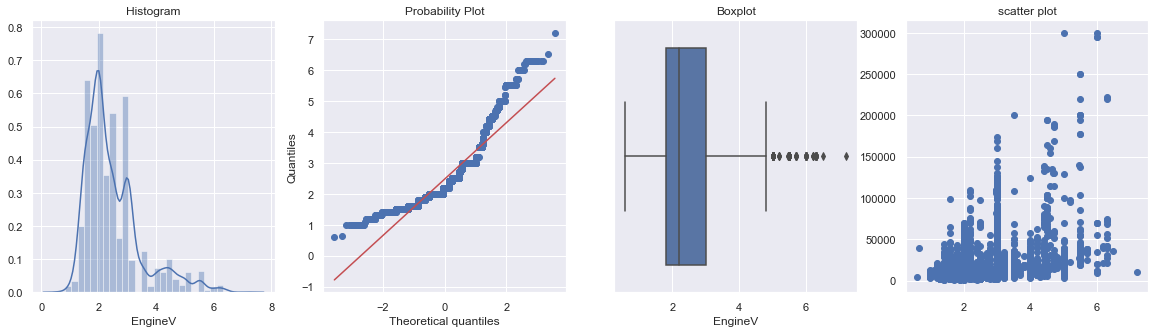

In [161]:
target = df['Price']
analyse_continuous(df,'EngineV',target)

Skewness: 4.428015
Kurtosis: 28.655122


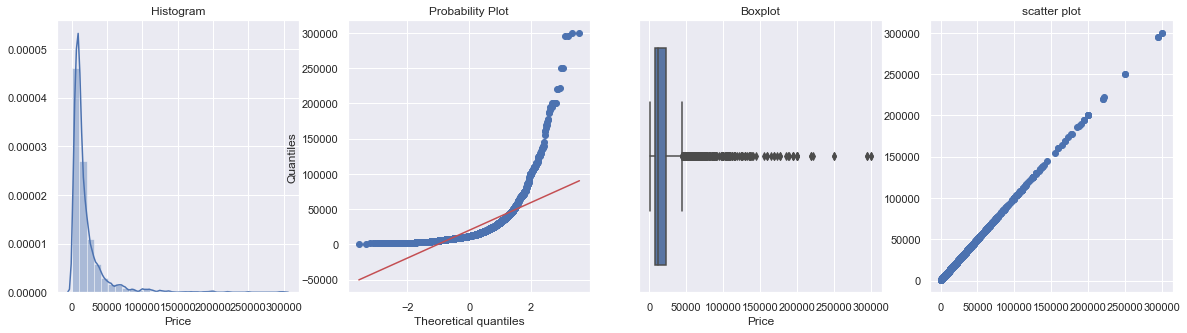

In [162]:
target = df['Price']
analyse_continuous(df,'Price',target)

In [163]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# for LSTAT in the boston house dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df, 'Price', 5)
upper_boundary, lower_boundary

(96312.5, -67175.0)

In [164]:
# inspect the number and percentage of outliers for RM

print('total number of Year: {}'.format(len(df)))

print('cars with more than upper_boundary of Mileage (right end outliers): {}'.format(
    len(df[df['Price'] > upper_boundary])))

print('cars with less than lower_boundary of Mileage (left end outliers: {}'.format(
    len(df[df['Price'] < lower_boundary])))
print()
print('% right end outliers: {}'.format(
    len(df[df['Price'] > upper_boundary]) / len(df)))

print('% left end outliers: {}'.format(
    len(df[df['Price'] < lower_boundary]) / len(df)))

total number of Year: 3952
cars with more than upper_boundary of Mileage (right end outliers): 99
cars with less than lower_boundary of Mileage (left end outliers: 0

% right end outliers: 0.025050607287449393
% left end outliers: 0.0


In [165]:
df = df[(df.Price < upper_boundary) & (df.Price > lower_boundary)]
df.shape

(3853, 9)

Skewness: 2.062913
Kurtosis: 4.676606


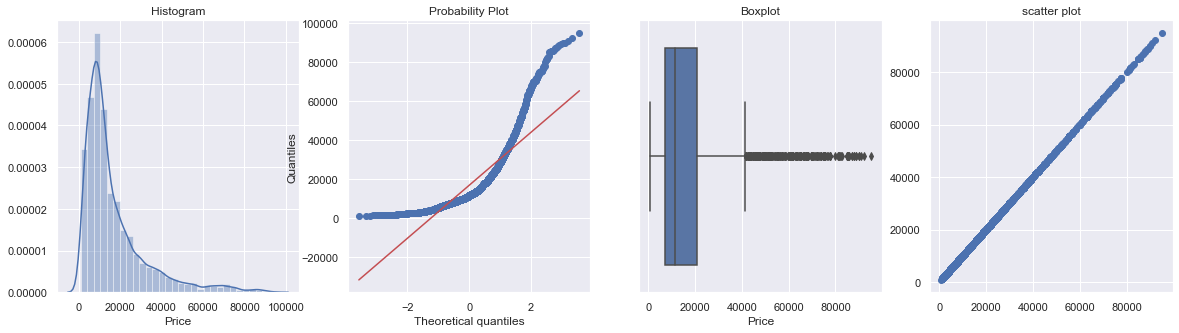

In [166]:
target = df['Price']
analyse_continuous(df,'Price',target)

In [167]:
df = df.reset_index(drop = True)
target = df['Price']
num_df = df[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1320.
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        06:11:31   Log-Likelihood:                -32889.
No. Observations:                3082   AIC:                         6.579e+04
Df Residuals:                    3078   BIC:                         6.581e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.673e+04    188.004     88.977      0.0

## Exp3

+ Use only numerical vars
+ Remove outliers
+ transform Price to have linear relationship

## Exp4

+ Use only numerical vars
+ Remove outliers
+ transform Price to have linear relationship
+ transform independent vars to have Normal distribution

# Categorical vars

# 5. Linear Regression without Preprocessing data

In [221]:
num_df = data[['Mileage','EngineV','Year']]
cat_df = data[['Brand','Body','Engine Type','Registration','Model']]
cat_df = pd.get_dummies(cat_df, drop_first=True)
target = data['Price']

Predictive_Model(num_df, cat_df, target)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     32.47
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:12:42   Log-Likelihood:                -35091.
No. Observations:                3220   AIC:                         7.077e+04
Df Residuals:                    2924   BIC:                         7.257e+04
Df Model:                         295                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Train set score:  0.7661072797657663
Test set score:  -1.6200891552144544e+19


=> Large number of inputs may cause overfitting problem

# 6. Preprocessing data

=> Preprocessing is an important step in Data Analysis which include many techniques to improve the accuracy of the predictive model through understanding data characteristics and preprocess data to fit model's ability

## 6.1. Numerical vars

In [226]:
target_var = 'Price'
num_vars = [var for var in data.columns if data[var].dtypes != 'O' and var != target_var]
target = data['Price']
num_df = data[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     409.0
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          4.92e-225
Time:                        07:32:39   Log-Likelihood:                -36910.
No. Observations:                3220   AIC:                         7.383e+04
Df Residuals:                    3216   BIC:                         7.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.98e+04    405.829     48.787      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Target variable: Price

#### Exploring the PDFs

Notice the minimum and maximum values with respect to the mean and the core tiles for each variable and examine them using the probability distribution functions. Price has a mean around nineteen thousand dollars, the minimum price is six hundred dollars twenty five, twenty five percent of price are under seven thousand dollars, 50 percent below eleven thousand five hundred dollars and seventy five percent are lower than twenty one thousand nine hundred dollars. **Yet the maximum price is three hundred thousand dollars**. Something strange is going on

A great step in the data exploration is to display the probability distribution function (PDF) of a variable. The PDF will show us how that variable is distributed. This makes it very easy to spot anomalies, such as outliers. The PDF is often thee basis on which we decide whether we want to transform a features

Outliers are observations that lie on abnormal distance from observations in the data, they will affect the regression dramatically in cost coefficients to be inflated (thoi phong) as the regression will try to place the line closer to those values. Outliers are a great issue for OLS, thus we must deal with them in some way. 

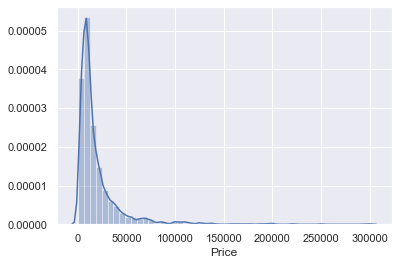

In [222]:
sns.distplot(data['Price'])

For optimal results, we would be looking for a normal distribution price however has an exponential one. This will surely be a problem for our regression. Obviously we have a few outliers in the price variable. 

Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples. Logic should also be applied. This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

In [223]:
# Declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data[data['Price']<q]
data_1.reset_index(drop=True, inplace=True)
# In this way we have essentially remove the top 1% of the data about 'Price'
data_1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,3984,7,Volkswagen,880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,3984,NaN,NaN,NaN,17837.1,18976.3,600,6980,11400,21000,129222
Body,3984,6,sedan,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,3984,NaN,NaN,NaN,165.116,102.766,0,93,160,230,980
EngineV,3984,NaN,NaN,NaN,2.74377,4.95606,0.6,1.8,2.2,3,99.99
Engine Type,3984,4,Diesel,1853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,3984,2,yes,3613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,3984,NaN,NaN,NaN,2006.29,6.67274,1969,2002.75,2007,2011,2016
Model,3984,302,E-Class,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN


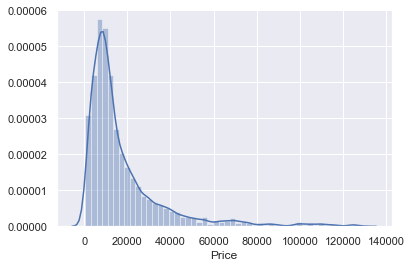

In [224]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

The data is still distributed in the same way but with less outliers. We can deal with it in the same way keeping only the data lower than the ninety ninth percentile

In [227]:
num_vars = [var for var in data.columns if data[var].dtypes != 'O' and var != target_var]
target = data_1['Price']
num_df = data_1[num_vars]
cat_df = pd.DataFrame()

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     575.3
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          9.32e-299
Time:                        07:33:58   Log-Likelihood:                -35262.
No. Observations:                3187   AIC:                         7.053e+04
Df Residuals:                    3183   BIC:                         7.056e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.789e+04    273.856     65.323      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Mileage

Skewness: 0.709469
Kurtosis: 1.883031


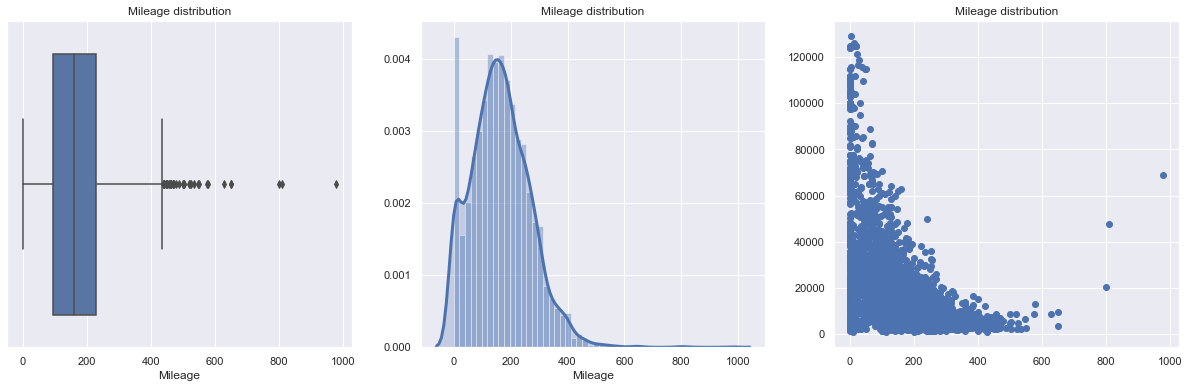

In [228]:
analyse_continuous(data_1,'Mileage',target_var,'Mileage'+' distribution')

The data is still distributed in the same way but with less outliers. We can deal with it in the same way keeping only the data lower than the ninety ninth percentile

In [229]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.reset_index(drop=True,inplace=True)

Skewness: 0.265109
Kurtosis: -0.426539


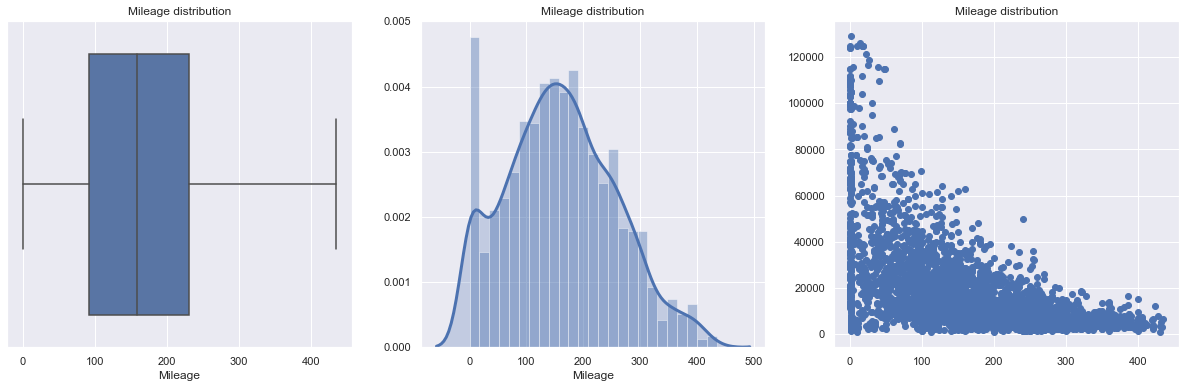

In [230]:
analyse_continuous(data_2,'Mileage',target_var,'Mileage'+' distribution')

In [231]:
target = data_2['Price']
num_df = data_2[num_vars]

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     609.0
Date:                Sat, 06 Jun 2020   Prob (F-statistic):          3.27e-312
Time:                        07:41:09   Log-Likelihood:                -34812.
No. Observations:                3155   AIC:                         6.963e+04
Df Residuals:                    3151   BIC:                         6.966e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.779e+04    267.038     66.623      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### EngineV

Skewness: 17.051901
Kurtosis: 311.502019


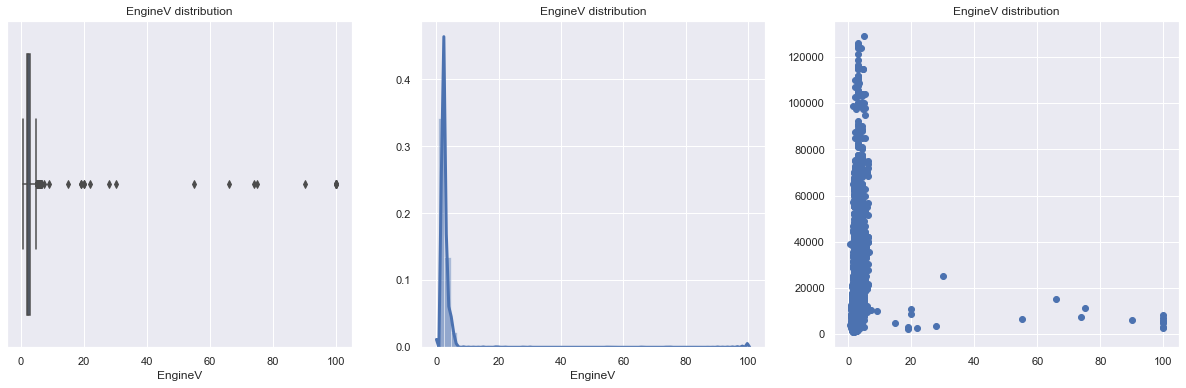

In [232]:
analyse_continuous(data_2,'EngineV',target_var,'EngineV'+' distribution')

In [233]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]
data_3.reset_index(drop=True,inplace=True)

Skewness: 1.490153
Kurtosis: 2.342794


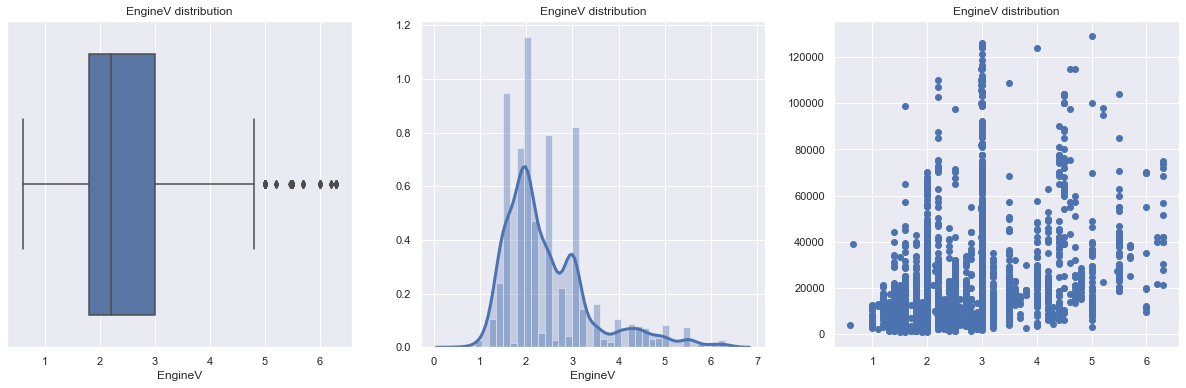

In [234]:
analyse_continuous(data_3,'EngineV',target_var,'EngineV'+' distribution')

Following this graph, we realize we can actually treat EngineV as a categorical variable. Even so, in this course we won't, but that's yet something else you may try on your own

In [235]:
target = data_3['Price']
num_df = data_3[num_vars]

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1170.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:41:26   Log-Likelihood:                -34065.
No. Observations:                3136   AIC:                         6.814e+04
Df Residuals:                    3132   BIC:                         6.816e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.785e+04    225.631     79.123      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Year

Skewness: -0.977779
Kurtosis: 1.077789


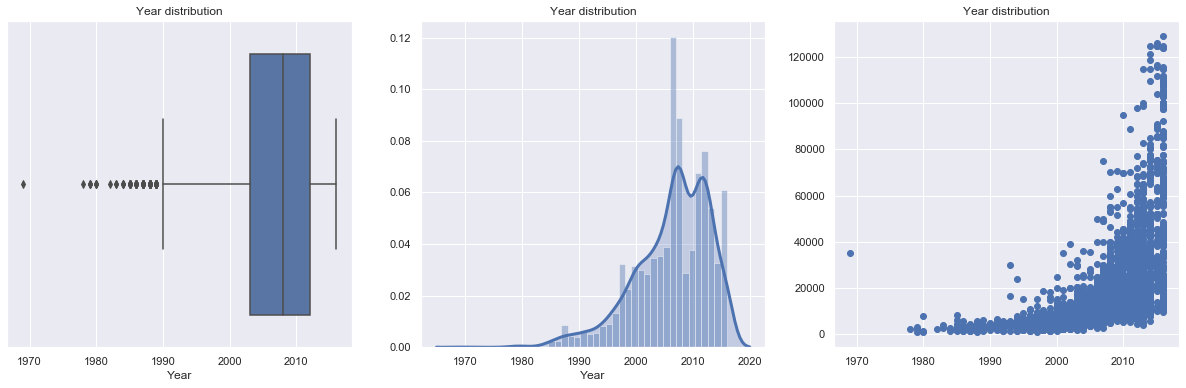

In [236]:
analyse_continuous(data_3,'Year',target_var,'Year'+' distribution')

The problem with year is it's on the low end. Most cars are newer but there seem to be a few vintage cars this time. This time, I'll take the first percentile and the we'll keep all observations that are higher

In [237]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
data_4.reset_index(drop=True,inplace=True)

Skewness: -0.718794
Kurtosis: 0.109411


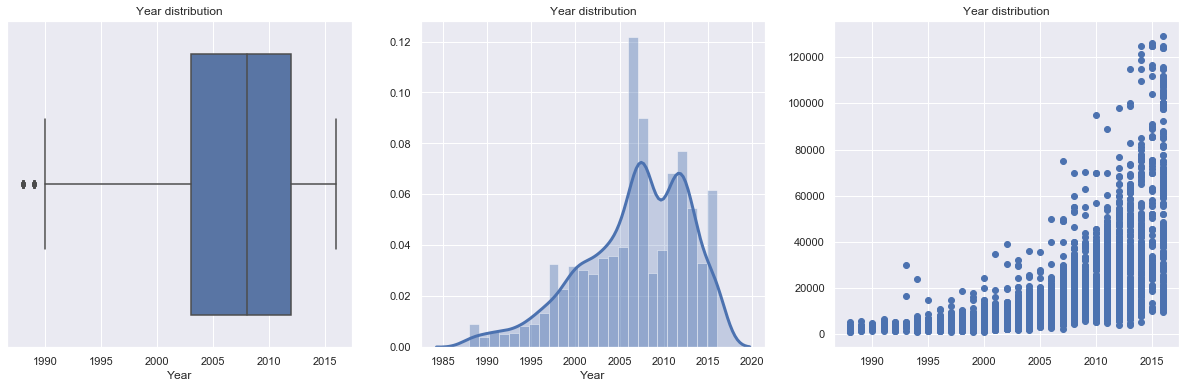

In [238]:
analyse_continuous(data_4,'Year',target_var,'Year'+' distribution')

In [239]:
target = data_4['Price']
num_df = data_4[num_vars]

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     1167.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:41:46   Log-Likelihood:                -33666.
No. Observations:                3093   AIC:                         6.734e+04
Df Residuals:                    3089   BIC:                         6.737e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.801e+04    232.319     77.519      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Data cleaned

In [240]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [241]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


## 6.2. Checking and fixing the assumptions in linear relationship

### 6.2.1. Checking linear relationship between independent and dependent variables

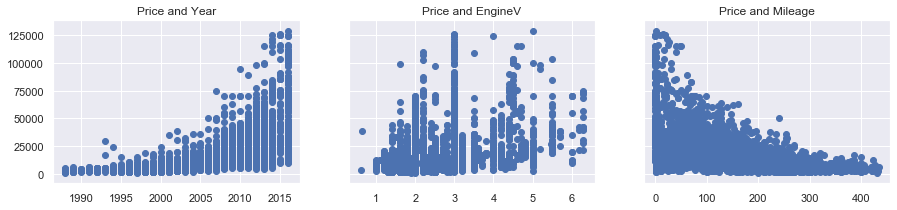

In [242]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can spot patterns but definitely not linear ones. We know we should not run a linear regression in this case. We should first transform one or more variables 

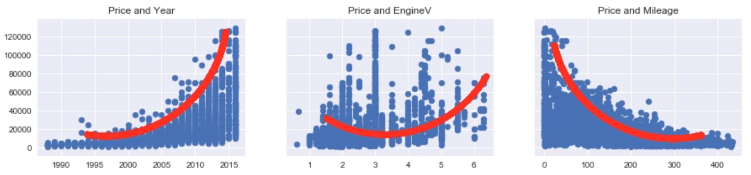

Recall the distribution plot of price to all these plot of price to all these plots are pointing us towards the idea that price is not normally distributed. And from there it's relationships with other rather normally distributed features is not linear. The patterns are quite exponential.

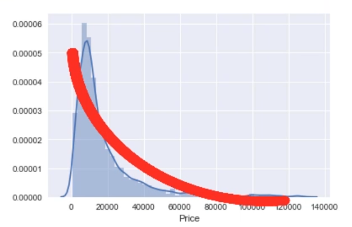

#### Log transformation

Log transformation is a common way to deal with this issue. It is especially useful when facing exponential relationships. 

In [243]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


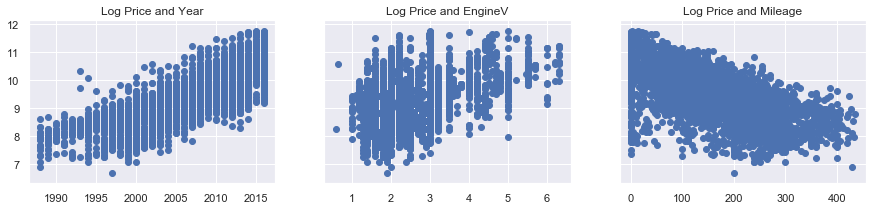

In [244]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

We can see a linear pattern in all plots now. The lines fit the data so much better

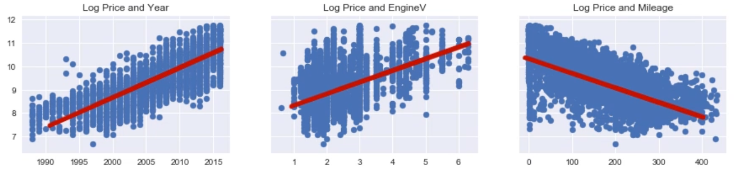

[]

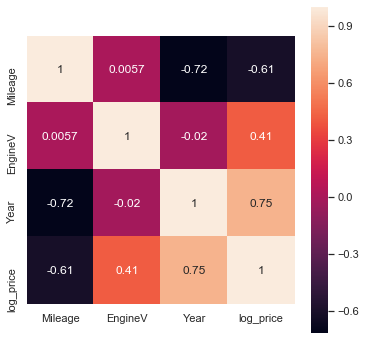

In [245]:
target_var = 'log_price'
corr = data_cleaned[num_vars + [target_var]].corr()
plt.figure(figsize = (6,6))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)
plt.plot()

In [246]:
target = log_price
num_df = data_cleaned[num_vars]

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     3065.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:43:11   Log-Likelihood:                -1823.0
No. Observations:                3093   AIC:                             3654.
Df Residuals:                    3089   BIC:                             3678.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4126      0.008   1199.057      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 6.2.2. Normality and Homoscedasticity

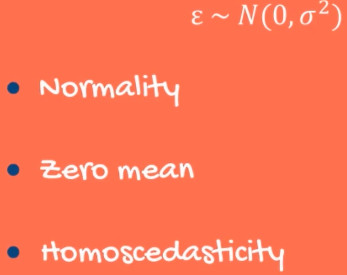

1. **Normality** is assumed for a big sample following the central limit theorem
2. **The zero mean** of the distribution of errors is accomplished to the inclusion of the intercept in the regression
3. **Homoscedascity** generally holds as we can see in the graphs. The reason for that is that we already implemented a log transformation which is the most common fix for homoscedascity

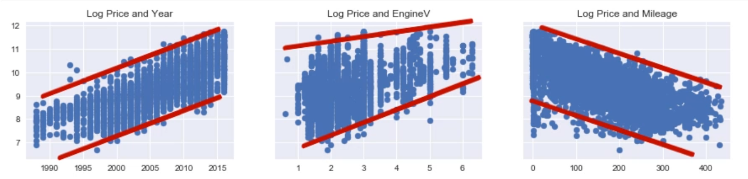

### 6.2.3. No autocorrelation

The observations we have are not coming from time series data or panel data they are simply a snapshot of the current situation at a second hand car sales website. Each row comes from a different customer who is willing to sell their car through the platform. Logically there is no reason for the observations to be dependent on each other. We are safe

### 6.2.4. Multicollinearity

It is logical that year and mileage are going to be correlated right. The newer the car the lower its mileage. Therefore we have grounds to expect some degree of multicore linearity in the data

In [247]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

The IAF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


+ When VIF is 1, it means that there is no multiple linearity at all. This is also the minimum value of the measure
+ Generally, values between 1 and 5 are considered perfectly OK
+ Values above 5 is unacceptable

=> So it seems like a year is definitely too correlated with the other variables. Therefore I will only remove year

In [249]:
target = log_price
num_df = data_cleaned[['Mileage','EngineV']]

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1787.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:48:03   Log-Likelihood:                -2769.3
No. Observations:                3093   AIC:                             5545.
Df Residuals:                    3090   BIC:                             5563.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4140      0.011    883.294      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [250]:
target = log_price
num_df = data_cleaned[['Year','EngineV']]

Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     4325.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:48:07   Log-Likelihood:                -1893.6
No. Observations:                3093   AIC:                             3793.
Df Residuals:                    3090   BIC:                             3811.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4133      0.008   1172.307      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 5. No Endogeneity

There are tests to check if it is violated or one can take the residuals and find theire correlation with each independent x. This can be checked after regression is created

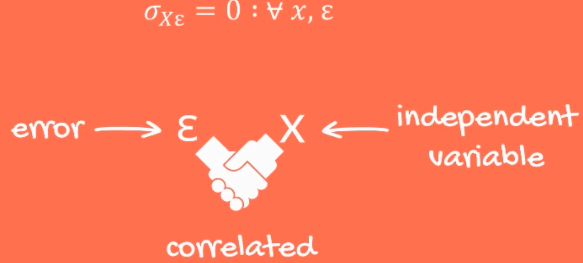

## 6.3. Create dummy variables

### All

If we have N categories for a feature, we have to create N-1 dummies. 

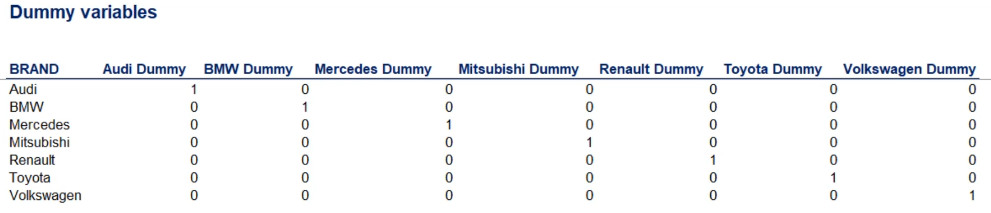

For the first brand we will not create a dummy variable. The reason is if all other dummy variables are zeros, it's clear that the car is an Audi. If we include a separate variable called Audi we will introduce multicolinearity to the regression as the Audi dummy would be perfectly determined by the other variables. Thus if we have n categories there will only be N minus one dummies 

In [251]:
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']
cat_vars

['Brand', 'Body', 'Engine Type', 'Registration', 'Model']

#### without removing the first dummy

In [252]:
cat_df = pd.get_dummies(data_cleaned[cat_vars])

selected_cols = [col for col in cat_df if col not in ['Price','log_price']]
variables = cat_df[selected_cols]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,inf,Brand_Audi
1,inf,Brand_BMW
2,inf,Brand_Mercedes-Benz
3,inf,Brand_Mitsubishi
4,inf,Brand_Renault
5,inf,Brand_Toyota
6,inf,Brand_Volkswagen
7,inf,Body_crossover
8,inf,Body_hatch
9,inf,Body_other


#### Removing the first dummy

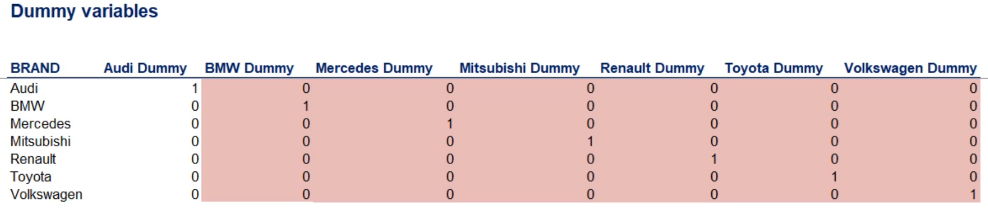

In [253]:
cat_df = pd.get_dummies(data_cleaned[cat_vars], drop_first=True)
cat_df.head()

,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
cat_df.shape

(3867, 305)

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

selected_cols = [col for col in cat_df if col not in ['Price','log_price']]
variables = cat_df[selected_cols]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

vif

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,115.932551,Brand_BMW
1,378.332128,Brand_Mercedes-Benz
2,inf,Brand_Mitsubishi
3,inf,Brand_Renault
4,inf,Brand_Toyota
5,inf,Brand_Volkswagen
6,7.094669,Body_hatch
7,5.954641,Body_other
8,19.071272,Body_sedan
9,7.104302,Body_vagon


In [255]:
target = log_price
num_df = data_cleaned[num_vars]

Predictive_Model(num_df, cat_df, target)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     164.0
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:50:58   Log-Likelihood:                 470.03
No. Observations:                3093   AIC:                            -372.1
Df Residuals:                    2809   BIC:                             1342.
Df Model:                         283                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Train set score:  0.9429163891977382
Test set score:  -2.925844468705016e+18


### Brand

In [256]:
cat_vars = ['Brand']
cat_df = pd.get_dummies(data_cleaned[cat_vars])

print(cat_df.shape)
cat_df.head()

(3867, 7)


,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0


In [257]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1336.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:51:38   Log-Likelihood:                -1500.4
No. Observations:                3093   AIC:                             3021.
Df Residuals:                    3083   BIC:                             3081.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.2098    

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [258]:
cat_vars = ['Brand']
cat_df = pd.get_dummies(data_cleaned[cat_vars], drop_first=True)
print(cat_df.shape)
cat_df.head()

(3867, 6)


,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0


In [259]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1336.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:51:43   Log-Likelihood:                -1500.4
No. Observations:                3093   AIC:                             3021.
Df Residuals:                    3083   BIC:                             3081.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.5159    

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [84]:
cat_vars = ['Brand']
cat_df = pd.get_dummies(data_cleaned[cat_vars])
print(cat_df.shape)
cat_df.head()

(3867, 7)


,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0


In [85]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1336.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):               0.00
Time:                        06:32:16   Log-Likelihood:                -1500.4
No. Observations:                3093   AIC:                             3021.
Df Residuals:                    3083   BIC:                             3081.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.2098    

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [260]:
data_cleaned['new_Brand'] = data_cleaned['Brand'].map({'BMW':1,'Mercedes-Benz':0,'Audi':0,'Toyota':0,'Renault':0,'Volkswagen':0,'Mitsubishi':0})
data_cleaned['new_Brand'].unique()

array([1, 0], dtype=int64)

In [261]:
target = data_cleaned['log_price']
cat_df = data_cleaned[['new_Brand']]
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     2413.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:52:43   Log-Likelihood:                -1766.2
No. Observations:                3093   AIC:                             3542.
Df Residuals:                    3088   BIC:                             3573.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3758      0.008   1111.528      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Body

In [262]:
cat_vars = ['Body']
cat_df = pd.get_dummies(data_cleaned[cat_vars], drop_first=True)
print(cat_df.shape)
cat_df.head()

(3867, 5)


,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [263]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:52:56   Log-Likelihood:                -1683.2
No. Observations:                3093   AIC:                             3384.
Df Residuals:                    3084   BIC:                             3439.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6566      0.018    523.529      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [264]:
data_cleaned['new_Body'] = data_cleaned['Body'].map({'crossover':1,'sedan':0,'van':0,'vagon':0,'other':0,'hatch':0})
data_cleaned['new_Body'].unique()

array([0, 1], dtype=int64)

In [265]:
cat_df = data_cleaned[['new_Body']]
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     2469.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:53:00   Log-Likelihood:                -1739.4
No. Observations:                3093   AIC:                             3489.
Df Residuals:                    3088   BIC:                             3519.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3556      0.009   1064.158      0.0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Engine Type

In [266]:
cat_vars = ['Engine Type']
cat_df = pd.get_dummies(data_cleaned[cat_vars], drop_first=True)
print(cat_df.shape)
cat_df.head()

(3867, 3)


,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,0,0,1
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [267]:
Predictive_Model(num_df, cat_df, target)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1538.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:53:06   Log-Likelihood:                -1818.1
No. Observations:                3093   AIC:                             3650.
Df Residuals:                    3086   BIC:                             3692.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.4262      0

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [268]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [269]:
data_cleaned['new_Engine Type'] = data_cleaned['Engine Type'].map({'Diesel':0,'Petrol':0,'Gas':0,'Other':1})
data_cleaned['new_Engine Type'].unique()

array([0, 1], dtype=int64)

In [270]:
cat_df = data_cleaned[['new_Engine Type']]
Predictive_Model(num_df, cat_df, targets)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2307.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:53:23   Log-Likelihood:                -1818.7
No. Observations:                3093   AIC:                             3647.
Df Residuals:                    3088   BIC:                             3678.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.4165      0.008   11

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Registration

In [271]:
cat_vars = ['Registration']
cat_df = pd.get_dummies(data_cleaned[cat_vars], drop_first=True)
print(cat_df.shape)
cat_df.head()

(3867, 1)


,Registration_yes
0,1
1,1
2,1
3,1
4,1


In [272]:
Predictive_Model(num_df, cat_df, targets)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     3142.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:53:32   Log-Likelihood:                -1447.6
No. Observations:                3093   AIC:                             2905.
Df Residuals:                    3088   BIC:                             2935.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7423      0.024  

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Model

In [273]:
cat_vars = ['Model']
cat_df = pd.get_dummies(data_cleaned[cat_vars], drop_first=True)
print(cat_df.shape)
cat_df.head()

(3867, 290)


,Model_100,Model_11,Model_116,Model_118,Model_120,Model_19,Model_190,Model_200,Model_210,Model_220,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
Predictive_Model(num_df, cat_df, targets)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     78.65
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:53:36   Log-Likelihood:                -627.36
No. Observations:                3093   AIC:                             1803.
Df Residuals:                    2819   BIC:                             3457.
Df Model:                         273                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Linear Regression Model

### Declare the inputs and the targets

In [275]:
data_cleaned.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price', 'new_Brand', 'new_Body',
       'new_Engine Type'],
      dtype='object')

In [276]:
num_df = data_cleaned[['Mileage','EngineV','Year']]
cat_df = data_cleaned[['Brand','Body','Engine Type','Registration']]

### Scale numerical features

In [277]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(num_df)
scaled_df = scaler.transform(num_df)
scaled_df = pd.DataFrame(inputs_scaled, columns = num_df.columns)
scaled_df.head()

,Mileage,EngineV,Year
0,1.217908,-0.474525,-2.574086
1,2.786602,0.473599,-1.263272
2,2.065003,2.685886,-0.607866
3,0.830963,1.843110,0.047541
4,-0.423992,-0.474525,0.702948


### create dummy vars for categorical features

In [278]:
dummy_df = pd.get_dummies(cat_df, drop_first=True)
dummy_df.head()

,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


Note: it is not usually recommended to standardize dummy variables. In fact, many practitioners would argue strongly agains it

### Create preprocessed data

In [279]:
input_df = pd.concat([scaled_df,dummy_df],axis=1)
target = data_cleaned[['log_price']]

data_preprocessed = pd.concat([input_df,target],axis=1)
print(data_preprocessed.shape)
data_preprocessed.head()

(3867, 19)


,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,log_price
0,1.217908,-0.474525,-2.574086,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,8.342840
1,2.786602,0.473599,-1.263272,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,8.974618
2,2.065003,2.685886,-0.607866,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,9.495519
3,0.830963,1.843110,0.047541,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,10.043249
4,-0.423992,-0.474525,0.702948,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,9.814656


### Train Test Split

In [280]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_df, target, test_size=0.2, random_state=365)

### Using stats model

In [281]:
import statsmodels.api as sm

X = sm.add_constant(x_train)
results = sm.OLS(y_train, X).fit()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [282]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1314.
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:55:47   Log-Likelihood:                -613.86
No. Observations:                3093   AIC:                             1266.
Df Residuals:                    3074   BIC:                             1380.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.1319      0.027    339.884      0.000       9.079       9.185
Mileage                -0.1083      0.008    -13.176      0.000      -0.124      -0.092
EngineV                 0.2189      0.007     32.694      0.000       0.206       0.232
Year                    0.5070      0.008     61.150      0.000       0.491       0.523
Brand_BMW               0.0702      0.022      3.255      0.001       0.028       0.113
Brand_Mercedes-Benz     0.0068      0.021      0.321      0.748      -0.035       0.049
Brand_Mitsubishi       -0.4993      0.026    -18.866      0.000      -0.551      -0.447
Brand_Renault          -0.6486      0.025    -26.202      0.000      -0.697      -0.600
Brand_Toyota           -0.2333      0.023    -10.055      0.000      -0.279      -0.188
Brand_Volkswagen       -0.2494      0.021    -11.757      0.000      -0.291      -0.208
Body_hatch             -0.3766      0.027    -13.737      0.000      -0.430      -0.323
Body_other             -0.2580      0.022    -11.559      0.000      -0.302      -0.214
Body_sedan             -0.2922      0.017    -17.352      0.000      -0.325      -0.259
Body_vagon             -0.3324      0.024    -13.891      0.000      -0.379      -0.285
Body_van               -0.4333      0.022    -19.769      0.000      -0.476      -0.390
Engine Type_Gas        -0.1215      0.018     -6.623      0.000      -0.157      -0.086
Engine Type_Other      -0.1169      0.033     -3.571      0.000      -0.181      -0.053
Engine Type_Petrol     -0.1250      0.014     -8.679      0.000      -0.153      -0.097
Registration_yes        0.8753      0.020     42.850      0.000       0.835       0.915
==============================================================================
Omnibus:                      260.747   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.470
Skew:                          -0.121   Prob(JB):                         0.00
Kurtosis:                       6.440   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using sklearn

In [283]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [284]:
y_hat = reg.predict(X_train)

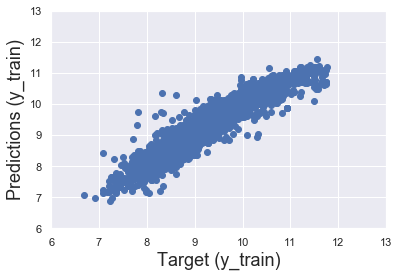

In [285]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size = 18)
plt.ylabel('Predictions (y_train)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

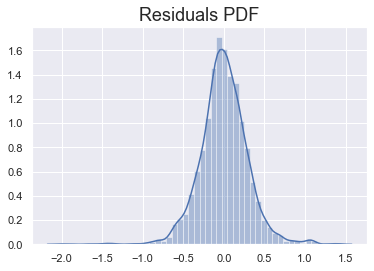

In [286]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18)
plt.show()

In [287]:
reg.score(X_train, y_train)

0.8849485492094937

#### Finding the weights and bias

In [288]:
reg_summary = pd.DataFrame(X_train.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_[0]
reg_summary

,Features,Weights
0,Mileage,-0.108344
1,EngineV,0.218881
2,Year,0.507025
3,Brand_BMW,0.070218
4,Brand_Mercedes-Benz,0.006849
5,Brand_Mitsubishi,-0.499261
6,Brand_Renault,-0.648632
7,Brand_Toyota,-0.233310
8,Brand_Volkswagen,-0.249414
9,Body_hatch,-0.376620


### Testing

In [289]:
y_hat_test = reg.predict(X_test)

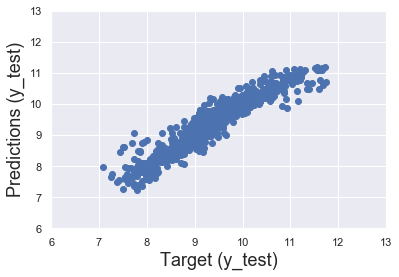

In [290]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Target (y_test)', size = 18)
plt.ylabel('Predictions (y_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

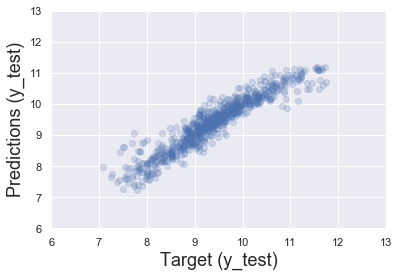

In [291]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Target (y_test)', size = 18)
plt.ylabel('Predictions (y_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [292]:
reg.score(X_test, y_test)

0.8875448762204204

In [293]:
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.050052
1,8.096292
2,7.373846
3,8.873636
4,9.094546


In [294]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,8518.982858
1,3282.274819
2,1593.751749
3,7141.202337
4,8906.586822


In [295]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,8518.982858,NaN
1,3282.274819,7900.0
2,1593.751749,NaN
3,7141.202337,NaN
4,8906.586822,NaN


In [296]:
y_test.head()

,log_price
1192,7.740664
3360,7.937375
2350,7.824046
3257,8.764053
892,9.121509


In [297]:
y_test = y_test.reset_index(drop = True)
y_test.head()

,log_price
0,7.740664
1,7.937375
2,7.824046
3,8.764053
4,9.121509


In [298]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,8518.982858,2300.0
1,3282.274819,2800.0
2,1593.751749,2500.0
3,7141.202337,6400.0
4,8906.586822,9150.0


In [299]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'] * 100)
df_pf.head()

,Prediction,Target,Residual,Difference%
0,8518.982858,2300.0,-6218.982858,270.390559
1,3282.274819,2800.0,-482.274819,17.224101
2,1593.751749,2500.0,906.248251,36.249930
3,7141.202337,6400.0,-741.202337,11.581287
4,8906.586822,9150.0,243.413178,2.660253


In [300]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16678.159053,18165.817106,1487.658053,23.303106
std,14067.654521,19967.858908,9745.038154,26.166910
min,1366.558774,1200.000000,-23675.039252,0.008150
25%,6502.797787,6900.000000,-1749.131999,7.738524
50%,12357.260514,11600.000000,59.230623,16.253640
75%,21973.290031,20500.000000,1649.253553,30.146462
max,73147.951567,126000.000000,81495.898963,270.390559


In [301]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
108,6500.53,6500.00,-0.53,0.01
738,24875.40,24900.00,24.60,0.10
79,15716.88,15700.00,-16.88,0.11
16,20526.82,20500.00,-26.82,0.13
323,9917.04,9900.00,-17.04,0.17
410,14830.84,14800.00,-30.84,0.21
340,15435.53,15400.00,-35.53,0.23
631,8480.22,8500.00,19.78,0.23
350,23444.30,23500.00,55.70,0.24
452,37604.64,37700.00,95.36,0.25
